In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.options.display.max_columns=None
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [4]:
df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [5]:
df=df.drop('_c39',axis=1)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [6]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'],format='%d-%m-%Y')
df['policy_bind_day']= df['policy_bind_date'].dt.day
df['policy_bind_month']= df['policy_bind_date'].dt.month
df['policy_bind_year']= df['policy_bind_date'].dt.year

In [7]:
df['incident_date']=pd.to_datetime(df['incident_date'],format='%d-%m-%Y')
df['incident_day']= df['incident_date'].dt.day
df['incident_month']= df['incident_date'].dt.month
df['incident_year']= df['incident_date'].dt.year

In [8]:
df.drop(['policy_bind_date','incident_date'],axis=1, inplace=True)
df

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex insured_education_level insured_occupation insured_hobbies  \
0          MALE                      MD       craft-repair        sleeping   
1          MALE                      MD  machine-op-inspct         reading   
2        FEMALE                     PhD              sales     board-games   
3        FEMALE                     PhD       armed-forces     board-games   
4          MALE               Associate              sales     board-games   
..          ...                     ...                ...             ...   
995      FEMALE                 Masters       craft-repair       paintball   
996      FEMALE                     PhD     prof-specialty        sleeping   
997      FEMALE                 Masters       armed-forces  bungie-jumping   
998        MALE               Associate  handlers-cleaners    base-jumping   
999      FEMALE               Associate              sales        kayaking   

    insured_relationship  capital-gains  capital-loss  \
0                husband          53300             0   
1         other-relative              0             0   
2              own-child          35100             0   
3              unmarried          48900        -62400   
4              unmarried          66000        -46000   
..                   ...            ...           ...   
995            unmarried              0             0   
996                 wife          70900             0   
997       other-relative          35100             0   
998                 wife              0             0   
999              husband              0             0   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                ?      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                ?      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [10]:
for i in df:
    print(f"for column {i},\n{df[i].value_counts()}\n\n")

for column months_as_customer,
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


for column age,
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


for column policy_number,
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


for column policy_state,
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


for column policy_csl,
250/500     351
100/300     349
500/100

In [11]:
cat_cols=list()
cat_cols=['policy_deductable','umbrella_limit','auto_year','policy_bind_year']
enc_cols=['incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','policy_bind_day','policy_bind_month','incident_day','incident_month']

In [12]:
# policy number is unique id associated with each policy, so not needed. similarly, incident_location and incident_year 
# have a unique value for each of the rows. so, not needed. also, insured_zip means zip code of insured's address. it's also of
# no use. hence, will be deleted.
# for columns collision type, policy_report_available and property damage , there are some datapoints 
# having '?' values which need to be imputed..

In [13]:
df.drop(['policy_number','incident_location','incident_year','insured_zip'],axis=1, inplace = True)
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation insured_hobbies  \
0                        MD       craft-repair        sleeping   
1                        MD  machine-op-inspct         reading   
2                       PhD              sales     board-games   
3                       PhD       armed-forces     board-games   
4                 Associate              sales     board-games   
..                      ...                ...             ...   
995                 Masters       craft-repair       paintball   
996                     PhD     prof-specialty        sleeping   
997                 Masters       armed-forces  bungie-jumping   
998               Associate  handlers-cleaners    base-jumping   
999               Associate              sales        kayaking   

    insured_relationship  capital-gains  capital-loss  \
0                husband          53300             0   
1         other-relative              0             0   
2              own-child          35100             0   
3              unmarried          48900        -62400   
4              unmarried          66000        -46000   
..                   ...            ...           ...   
995            unmarried              0             0   
996                 wife          70900             0   
997       other-relative          35100             0   
998                 wife              0             0   
999              husband              0             0   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                ?      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                ?      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car                ?      Minor Damage   

    authorities_contacted incident_state incident_city  \
0                  Police             SC      Columbus

In [14]:
df.head(2)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   

   capital-loss             incident_type  collision_type incident_severity  \
0             0  Single Vehicle Collision  Side Collision      Major Damage   
1             0             Vehicle Theft               ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   
1       2007              Y               27                  6   

   policy_bind_year  incident_day  incident_month  
0              2014            25               1  
1              2006            21               1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [16]:
cont_cols=[]
for i in df:
    if df[i].dtype =='object':
        cat_cols.append(i)
    else:
        if i in cat_cols:
            continue
        elif i in enc_cols:
            continue
        else:
            cont_cols.append(i)
print(cat_cols)
print('\n')
print(enc_cols)
print('\n')
print(cont_cols)

['policy_deductable', 'umbrella_limit', 'auto_year', 'policy_bind_year', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


['incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'policy_bind_day', 'policy_bind_month', 'incident_day', 'incident_month']


['months_as_customer', 'age', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for i in cat_cols:
    df[i]=le.fit_transform(df[[i]])
for j in ['collision_type','police_report_available','property_damage']:
    print(f"for column {j}\n{df[j].value_counts()}\n\n")

for column collision_type
2    292
3    276
1    254
0    178
Name: collision_type, dtype: int64


for column police_report_available
0    343
1    343
2    314
Name: police_report_available, dtype: int64


for column property_damage
0    360
1    338
2    302
Name: property_damage, dtype: int64




In [19]:
# in label encoder, for '?', 0 is used to encode this..

In [20]:
df['collision_type']=df['collision_type'].replace(0,2)
df['police_report_available']=df['police_report_available'].replace(0,1)
df['property_damage']=df['property_damage'].replace(0,1)
for j in ['collision_type','police_report_available','property_damage']:
    print(f"for column {j},\n{df[j].value_counts()}\n")
    continue

for column collision_type,
2    470
3    276
1    254
Name: collision_type, dtype: int64

for column police_report_available,
1    686
2    314
Name: police_report_available, dtype: int64

for column property_damage,
1    698
2    302
Name: property_damage, dtype: int64



<AxesSubplot:>

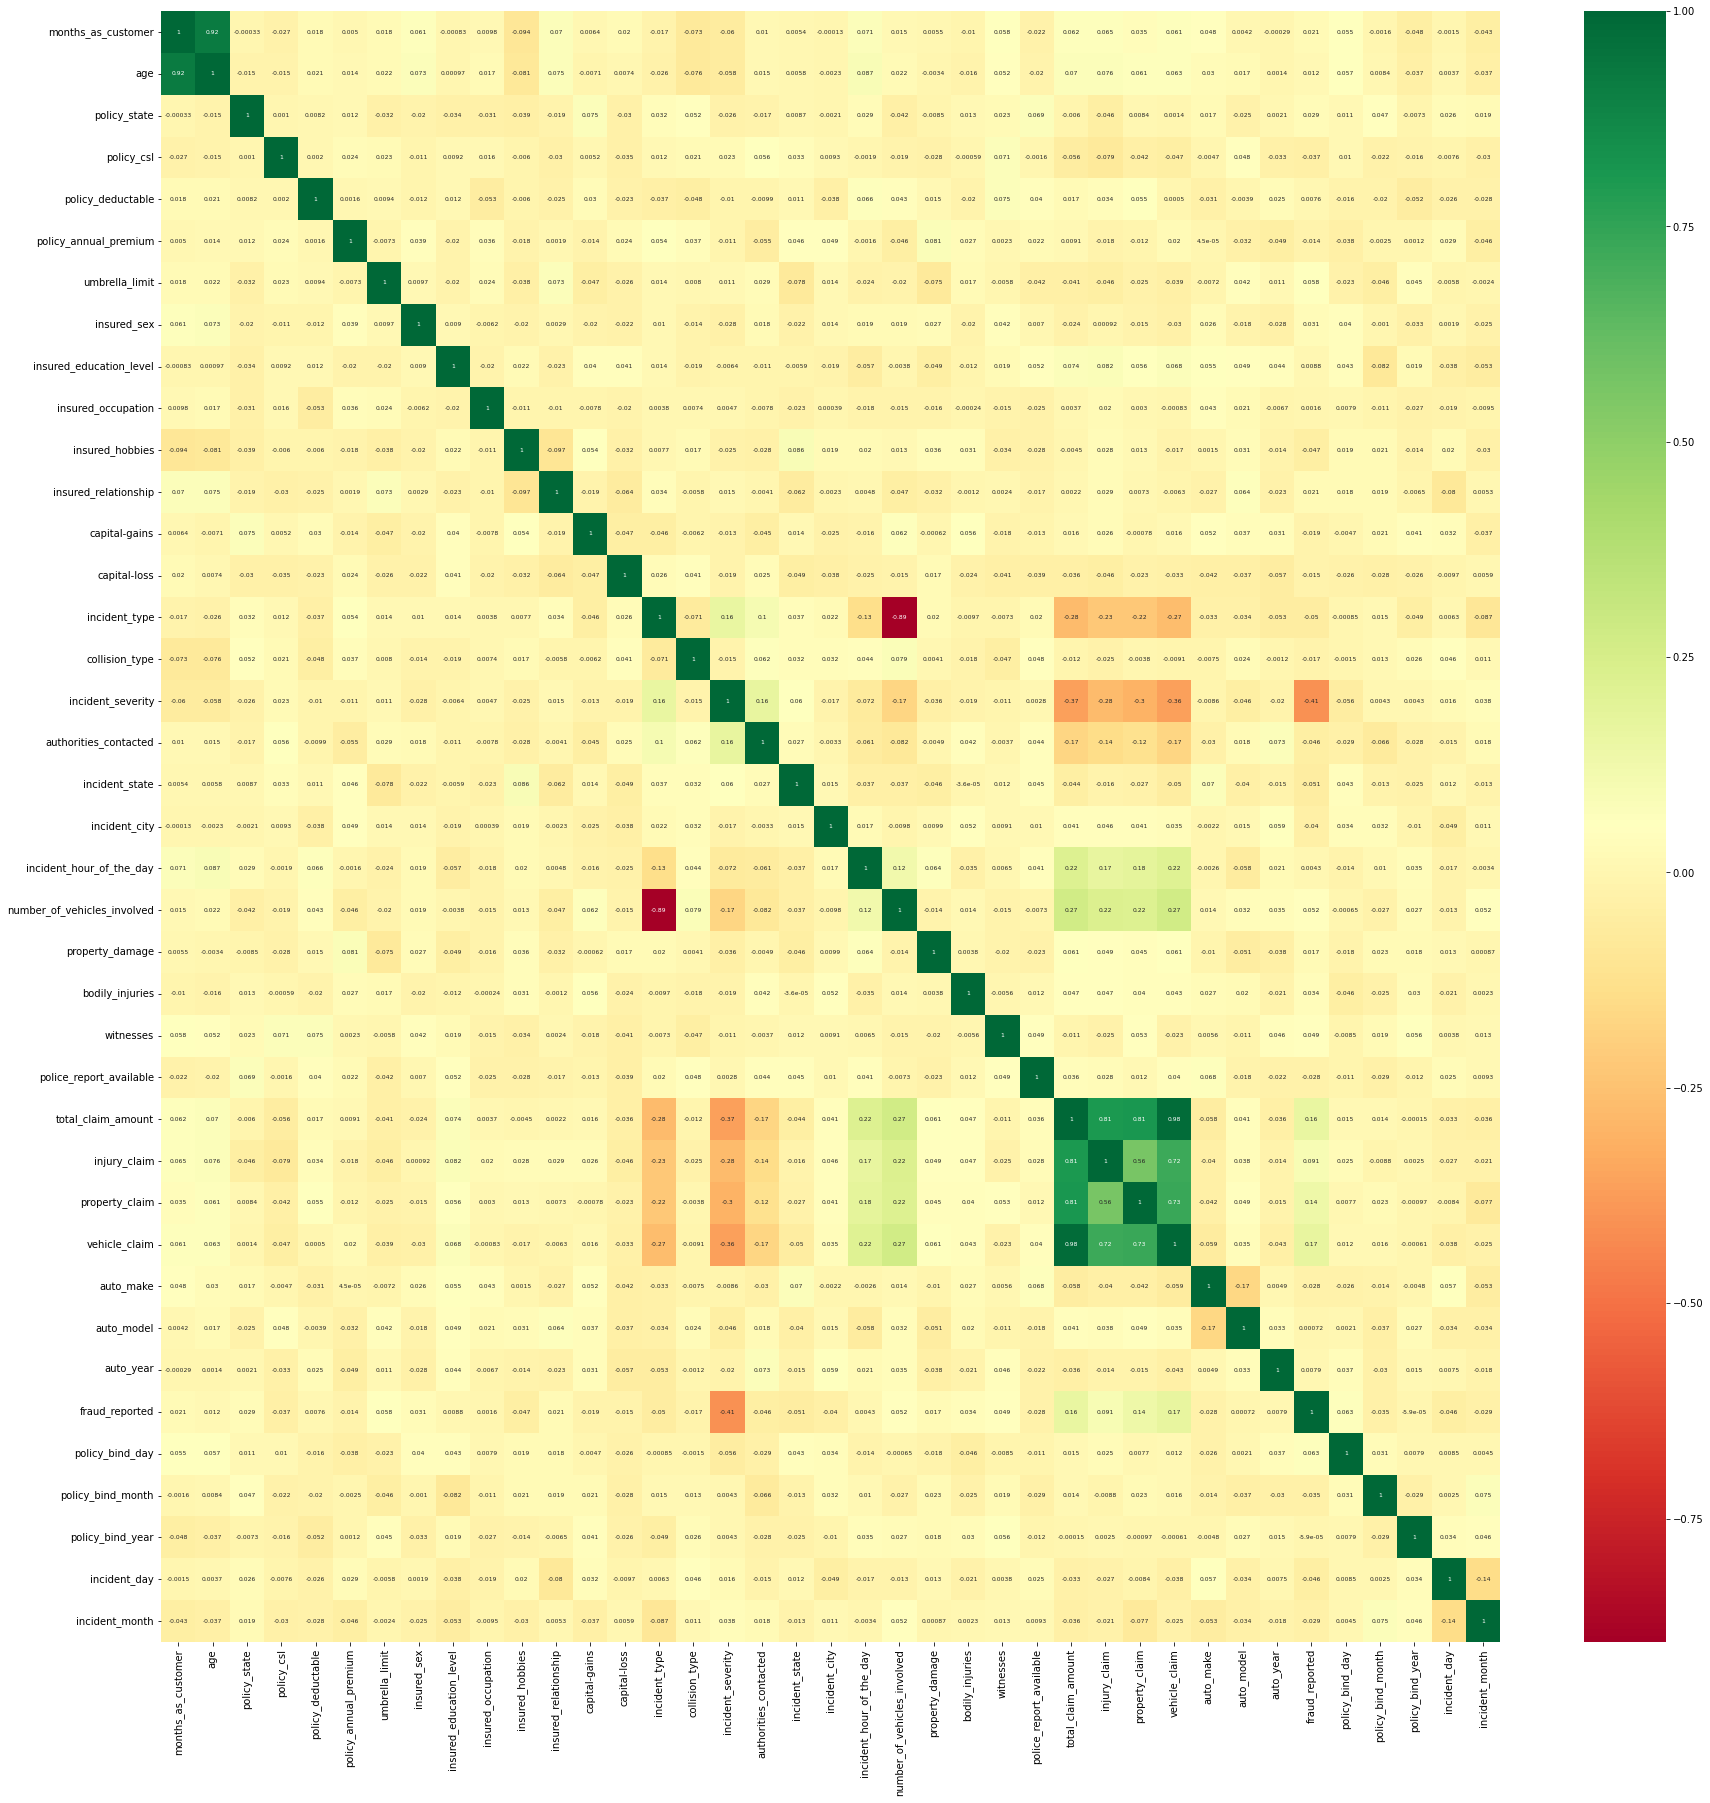

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':6},cmap="RdYlGn")

In [22]:
# let's check outliers first..

In [23]:
len(cont_cols)

9

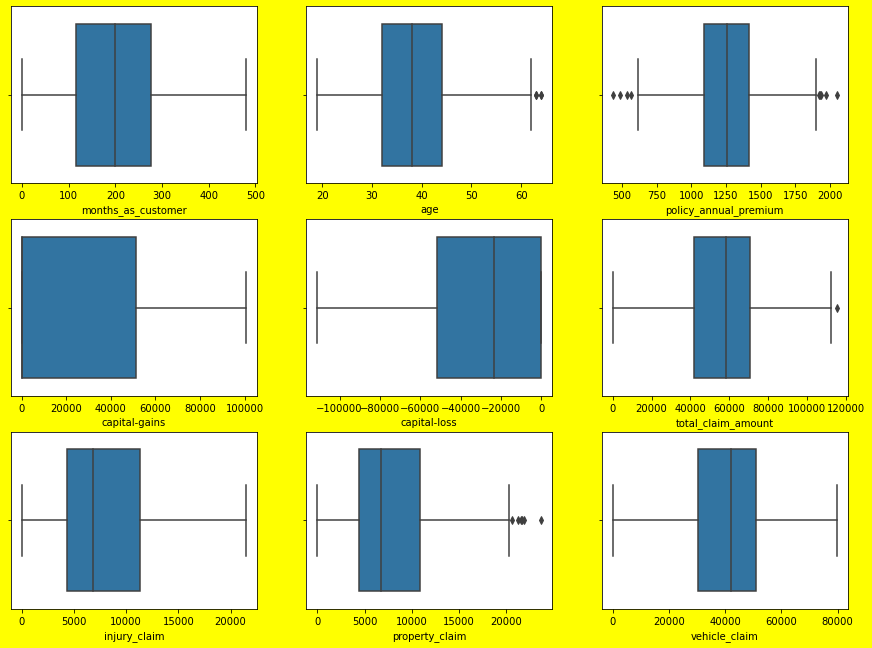

In [24]:
plotno=1
plt.figure(figsize=(15,15),facecolor='yellow')
for i in cont_cols:
    plt.subplot(4,3,plotno)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.show()

In [25]:
# there are few outliers in some features like property claim, age , policy_annual_premium, total_claim_amount.. we will check it by zscores..

In [26]:
# let's check skewness..

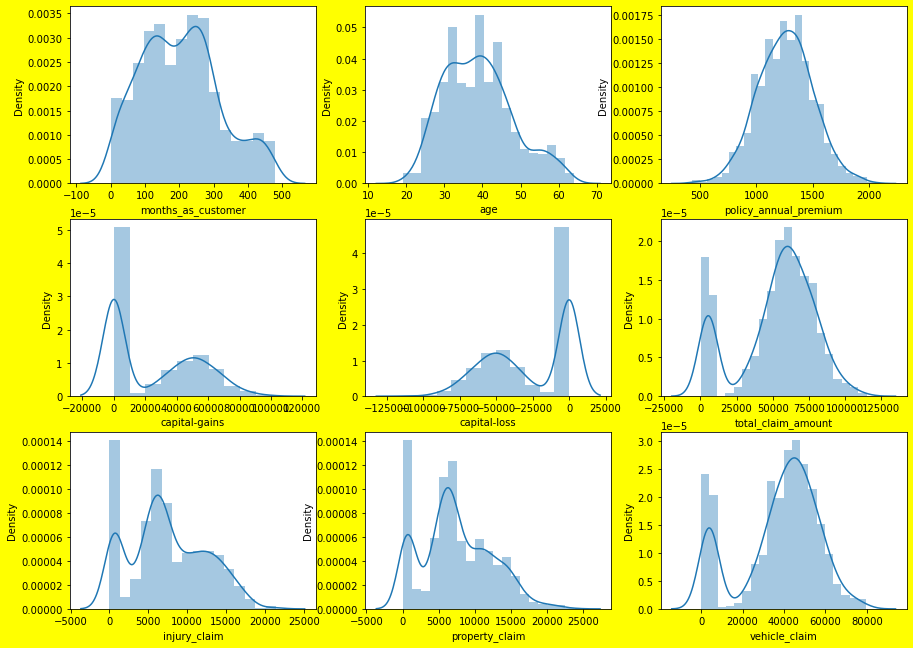

In [27]:
plotno=1
plt.figure(figsize=(15,15),facecolor='yellow')
for i in cont_cols:
    plt.subplot(4,3,plotno)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.show()

In [28]:
# little skewness is observed in some of the features..

In [29]:
# let's check the relation of target fraud with each feature one by one..

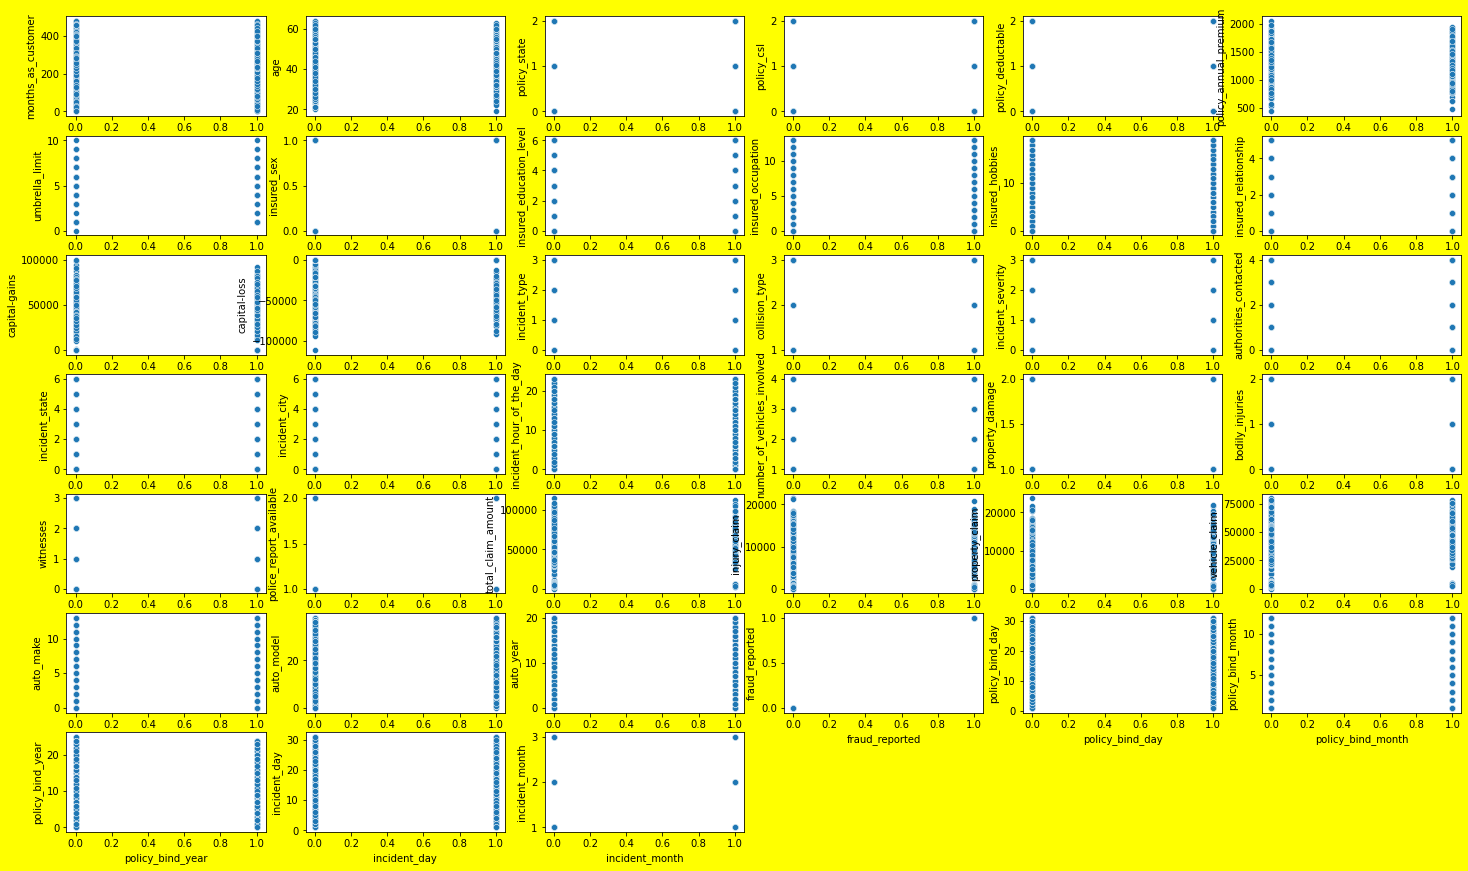

In [30]:
plotno=1
plt.figure(figsize=(25,15),facecolor='yellow')
for i in df:
    plt.subplot(7,6,plotno)
    sns.scatterplot(df['fraud_reported'],df[i])
    plt.xlabel(i)
    plotno+=1
plt.show()

In [31]:
# by looking at the above graphs, i don't find any feature which has no influence on the target.. let's proceed further..

In [32]:
df.drop_duplicates(inplace=True)
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1                  1   
1                   228   42             1           1                  2   
2                   134   29             2           0                  2   
3                   256   41             0           1                  2   
4                   228   44             0           2                  1   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2                  1   
996                 285   41             0           0                  1   
997                 130   34             2           1                  0   
998                 458   62             0           2                  2   
999                 456   60             2           1                  1   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               1            1   
1                  1197.22               5            1   
2                  1413.14               5            0   
3                  1415.74               6            0   
4                  1583.91               6            1   
..                     ...             ...          ...   
995                1310.80               1            0   
996                1436.79               1            0   
997                1383.49               3            0   
998                1356.92               5            1   
999                 766.19               1            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
995                     4              0             0              2   
996                     5          70900             0              2   
997                     2          35100             0              0   
998                     5              0             0              2   
999                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0                 3                  0                      4               4   
1                 2                  1                      4               5   
2                 2                  1                      4               1   
3                 1                  0                      4               2   
4                 2                  1                      2               1   
..              ...                ...                    ...             ...   
995               1                  1                      1               0   
996              

In [33]:
# no duplicate values..

In [34]:
df.describe()

months_as_customer          age  policy_state   policy_csl  \
count         1000.000000  1000.000000    1000.00000  1000.000000   
mean           203.954000    38.948000       1.01400     0.951000   
std            115.113174     9.140287       0.83096     0.804516   
min              0.000000    19.000000       0.00000     0.000000   
25%            115.750000    32.000000       0.00000     0.000000   
50%            199.500000    38.000000       1.00000     1.000000   
75%            276.250000    44.000000       2.00000     2.000000   
max            479.000000    64.000000       2.00000     2.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
count        1000.000000            1000.000000     1000.000000  1000.000000   
mean            0.965000            1256.406150        1.900000     0.463000   
std             0.805247             244.167395        1.917205     0.498879   
min             0.000000             433.330000        0.000000     0.000000   
25%             0.000000            1089.607500        1.000000     0.000000   
50%             1.000000            1257.200000        1.000000     0.000000   
75%             2.000000            1415.695000        1.000000     1.000000   
max             2.000000            2047.590000       10.000000     1.000000   

       insured_education_level  insured_occupation  insured_hobbies  \
count              1000.000000         1000.000000      1000.000000   
mean                  2.966000            6.653000         9.731000   
std                   1.948497            4.019048         5.674049   
min                   0.000000            0.000000         0.000000   
25%                   1.000000            3.000000         5.000000   
50%                   3.000000            7.000000        10.000000   
75%                   5.000000           10.000000        15.000000   
max                   6.000000           13.000000        19.000000   

       insured_relationship  capital-gains   capital-loss  incident_type  \
count           1000.000000    1000.000000    1000.000000    1000.000000   
mean               2.416000   25126.100000  -26793.700000       1.172000   
std                1.681003   27872.187708   28104.096686       1.081474   
min                0.000000       0.000000 -111100.000000       0.000000   
25%                1.000000       0.000000  -51500.000000       0.000000   
50%                2.000000       0.000000  -23250.000000       1.000000   
75%                4.000000   51025.000000       0.000000       2.000000   
max                5.000000  100500.000000       0.000000       3.000000   

       collision_type  incident_severity  authorities_contacted  \
count     1000.000000        1000.000000            1000.000000   
mean         2.022000           1.184000               2.167000   
std          0.728043           0.939695               1.532142   
min          1.000000           0.000000               0.000000   
25%          1.000000           0.000000               1.000000   
50%          2.000000           1.000000               2.000000   
75%          3.000000           2.000000               4.000000   
max          3.000000           3.000000               4.000000   

       incident_state  incident_city  incident_hour_of_the_day  \
count     1000.000000    1000.000000               1000.000000   
mean         3.242000       2.966000                 11.644000   
std          2.155942       2.044266                  6.951373   
min          0.000000       0.000000                  0.000000   
25%          1.000000       1.000000                  6.000000   
50%          4.000000       3.000000                 12.000000   
75%          5.000000       5.000000                 17.000000   
max          6.000000       6.000000                 23.000000   

       number_of_vehicles_involved  property_damage  bodily_injuries  \
count                   1000.00000      1000.000000      1000.000000

In [35]:
# the features capital_gain, capital_loss, vehicle_claim etc seems having some outliers but there was no outlier in these features as depicted by boxplots.. let's quantify this by zscores..

In [36]:
from scipy.stats import zscore

In [37]:
df_cont=pd.DataFrame()
for i in cont_cols:
    df_cont[i]=df[i]
df_cont

months_as_customer  age  policy_annual_premium  capital-gains  \
0                   328   48                1406.91          53300   
1                   228   42                1197.22              0   
2                   134   29                1413.14          35100   
3                   256   41                1415.74          48900   
4                   228   44                1583.91          66000   
..                  ...  ...                    ...            ...   
995                   3   38                1310.80              0   
996                 285   41                1436.79          70900   
997                 130   34                1383.49          35100   
998                 458   62                1356.92              0   
999                 456   60                 766.19              0   

     capital-loss  total_claim_amount  injury_claim  property_claim  \
0               0               71610          6510           13020   
1               0                5070           780             780   
2               0               34650          7700            3850   
3          -62400               63400          6340            6340   
4          -46000                6500          1300             650   
..            ...                 ...           ...             ...   
995             0               87200         17440            8720   
996             0              108480         18080           18080   
997             0               67500          7500            7500   
998             0               46980          5220            5220   
999             0                5060           460             920   

     vehicle_claim  
0            52080  
1             3510  
2            23100  
3            50720  
4             4550  
..             ...  
995          61040  
996          72320  
997          52500  
998          36540  
999           3680  

[1000 rows x 9 columns]

In [38]:
ind= np.where((np.abs(zscore(df_cont)))>3)
ind

(array([229, 248, 500, 763, 807], dtype=int64),
 array([2, 2, 7, 2, 4], dtype=int64))

In [39]:
df=df.drop(df.index[ind[0]])
df_cont=df_cont.drop(df_cont.index[ind[0]])
df.reset_index(drop=True,inplace=True)
df_cont.reset_index(drop=True,inplace=True)
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1                  1   
1                   228   42             1           1                  2   
2                   134   29             2           0                  2   
3                   256   41             0           1                  2   
4                   228   44             0           2                  1   
..                  ...  ...           ...         ...                ...   
990                   3   38             2           2                  1   
991                 285   41             0           0                  1   
992                 130   34             2           1                  0   
993                 458   62             0           2                  2   
994                 456   60             2           1                  1   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               1            1   
1                  1197.22               5            1   
2                  1413.14               5            0   
3                  1415.74               6            0   
4                  1583.91               6            1   
..                     ...             ...          ...   
990                1310.80               1            0   
991                1436.79               1            0   
992                1383.49               3            0   
993                1356.92               5            1   
994                 766.19               1            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
990                        5                   2               13   
991                        6                   9               17   
992                        5                   1                3   
993                        0                   5                0   
994                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
990                     4              0             0              2   
991                     5          70900             0              2   
992                     2          35100             0              0   
993                     5              0             0              2   
994                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0                 3                  0                      4               4   
1                 2                  1                      4               5   
2                 2                  1                      4               1   
3                 1                  0                      4               2   
4                 2                  1                      2               1   
..              ...                ...                    ...             ...   
990               1                  1                      1               0   
991              

In [40]:
# outliers removed..
# let's check skewness..


In [41]:
df.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.062014
policy_annual_premium          0.033107
umbrella_limit                 1.927891
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


In [42]:
df_cont.skew()

months_as_customer       0.358958
age                      0.473974
policy_annual_premium    0.033107
capital-gains            0.479472
capital-loss            -0.379708
total_claim_amount      -0.591848
injury_claim             0.270253
property_claim           0.359528
vehicle_claim           -0.618189
dtype: float64

In [43]:
# transformation required..

In [44]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [45]:
for i in cont_cols:
    df[i]=pt.fit_transform(df[[i]])
    df_cont[i]=pt.fit_transform(df[[i]])
df_cont.skew()

months_as_customer       0.001915
age                      0.002071
policy_annual_premium    0.006017
capital-gains            0.043962
capital-loss             0.086124
total_claim_amount       0.052544
injury_claim            -0.023557
property_claim           0.002263
vehicle_claim            0.051759
dtype: float64

In [46]:
df.skew()

months_as_customer            -0.134350
age                           -0.002319
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.062014
policy_annual_premium         -0.006511
umbrella_limit                 1.927891
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.044731
capital-loss                   0.089077
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


In [47]:
# skewness removed..

In [48]:
# let' check correlation between features..

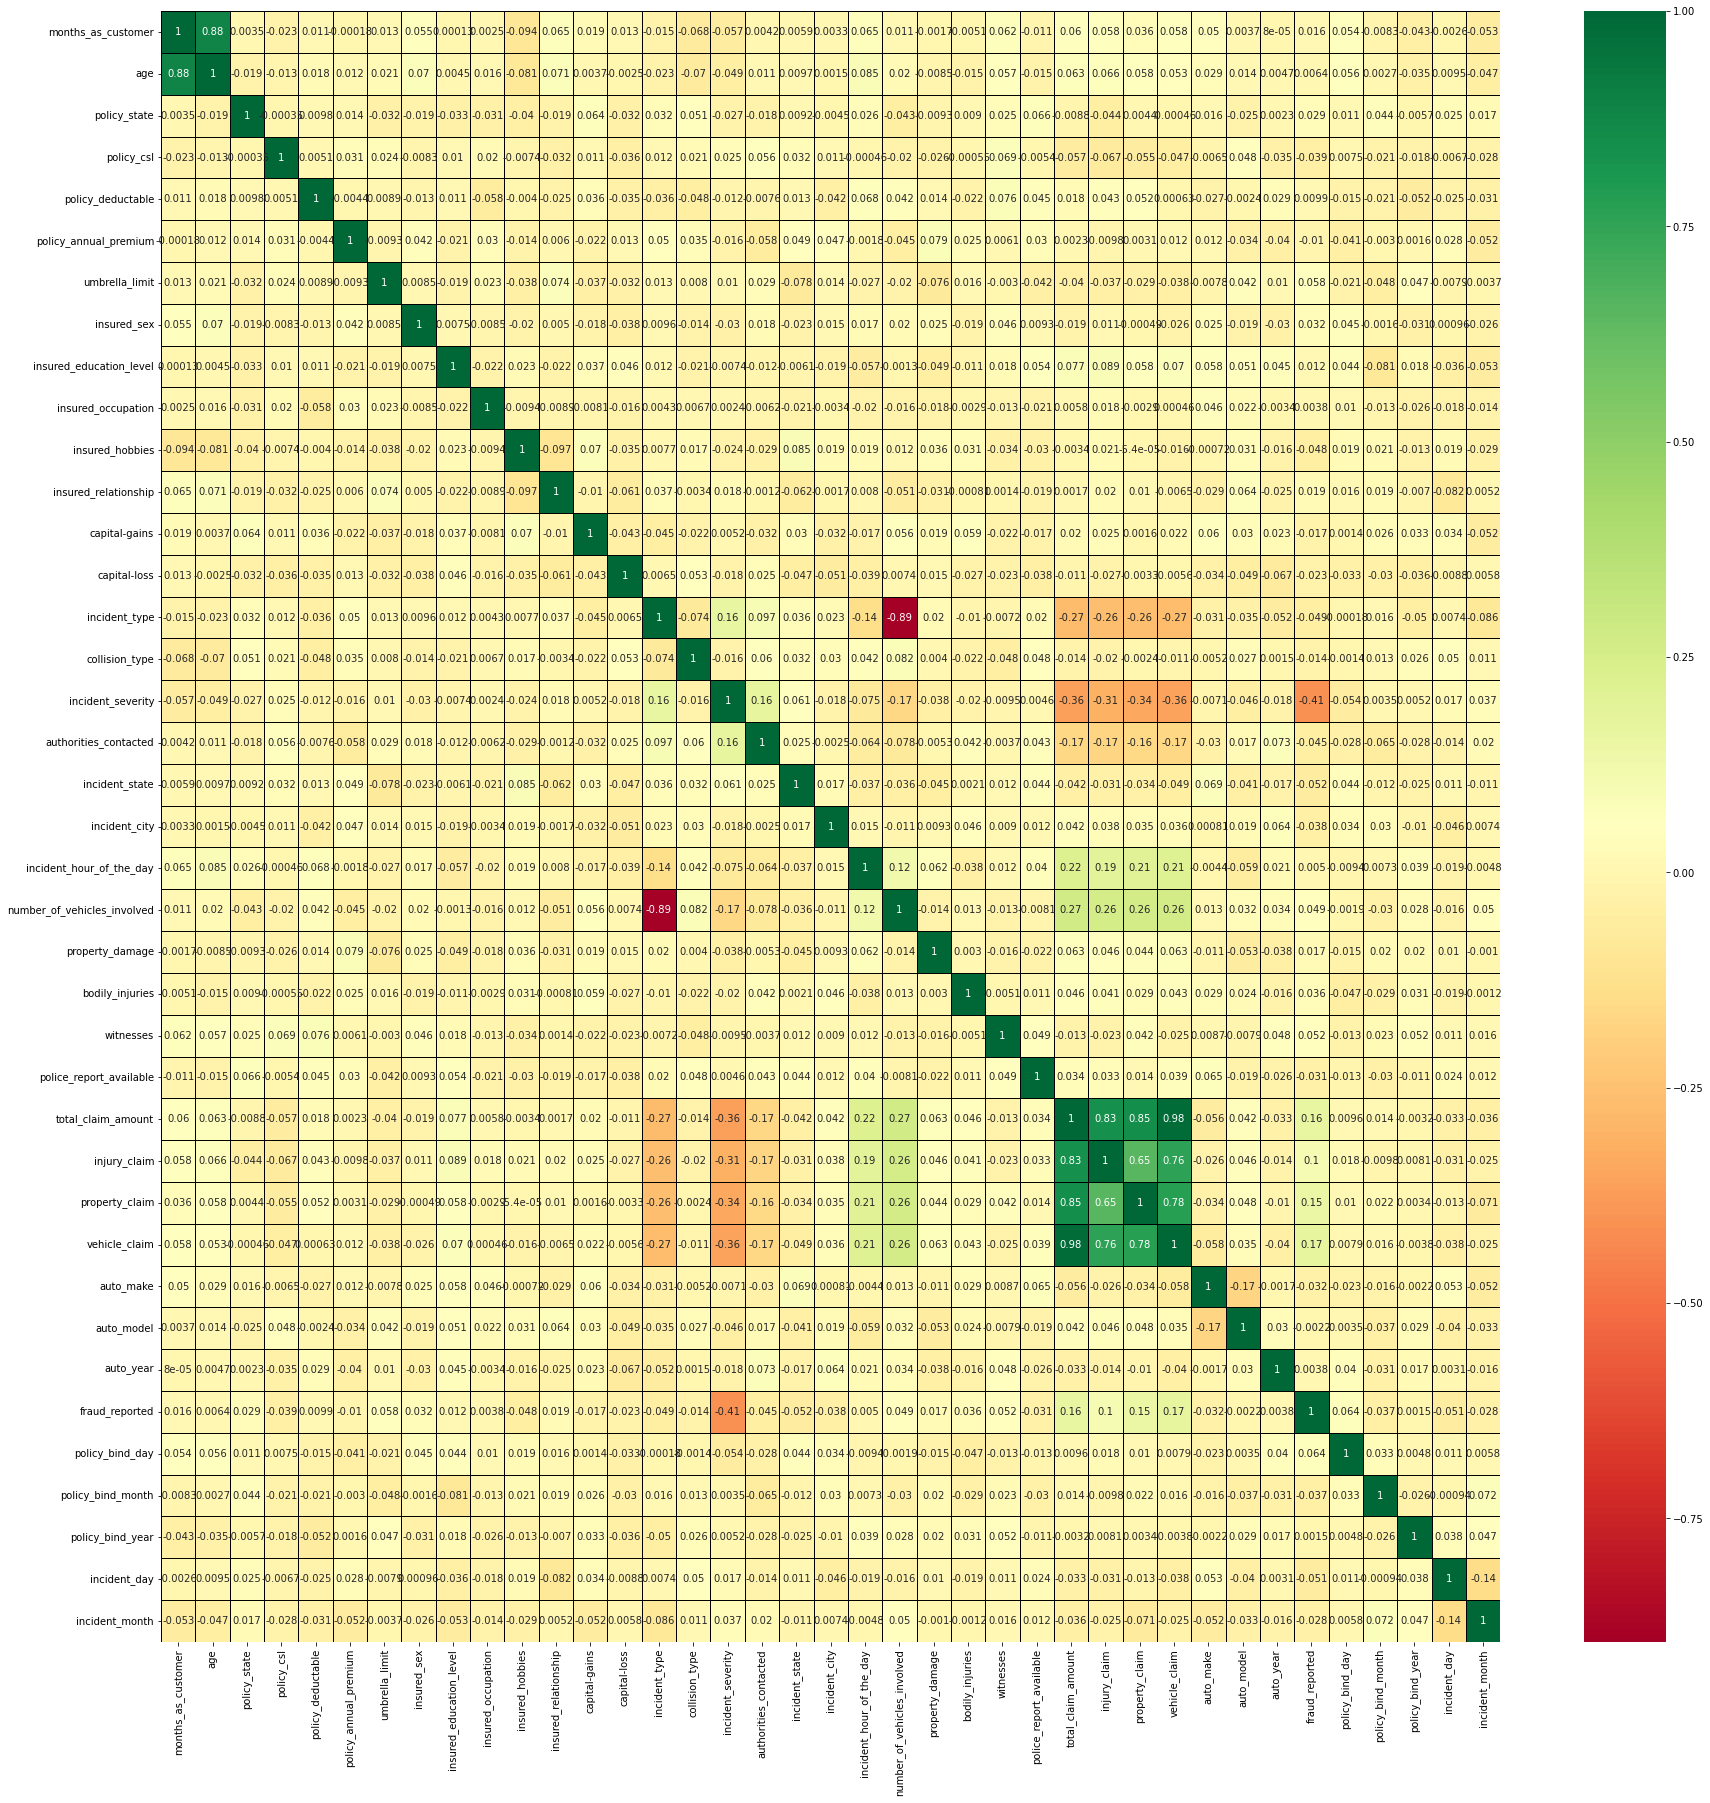

In [49]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',cmap="RdYlGn")
plt.show()

In [50]:
# total claim amount feature is highly correlated with three other features.. so, it's better to delete this..

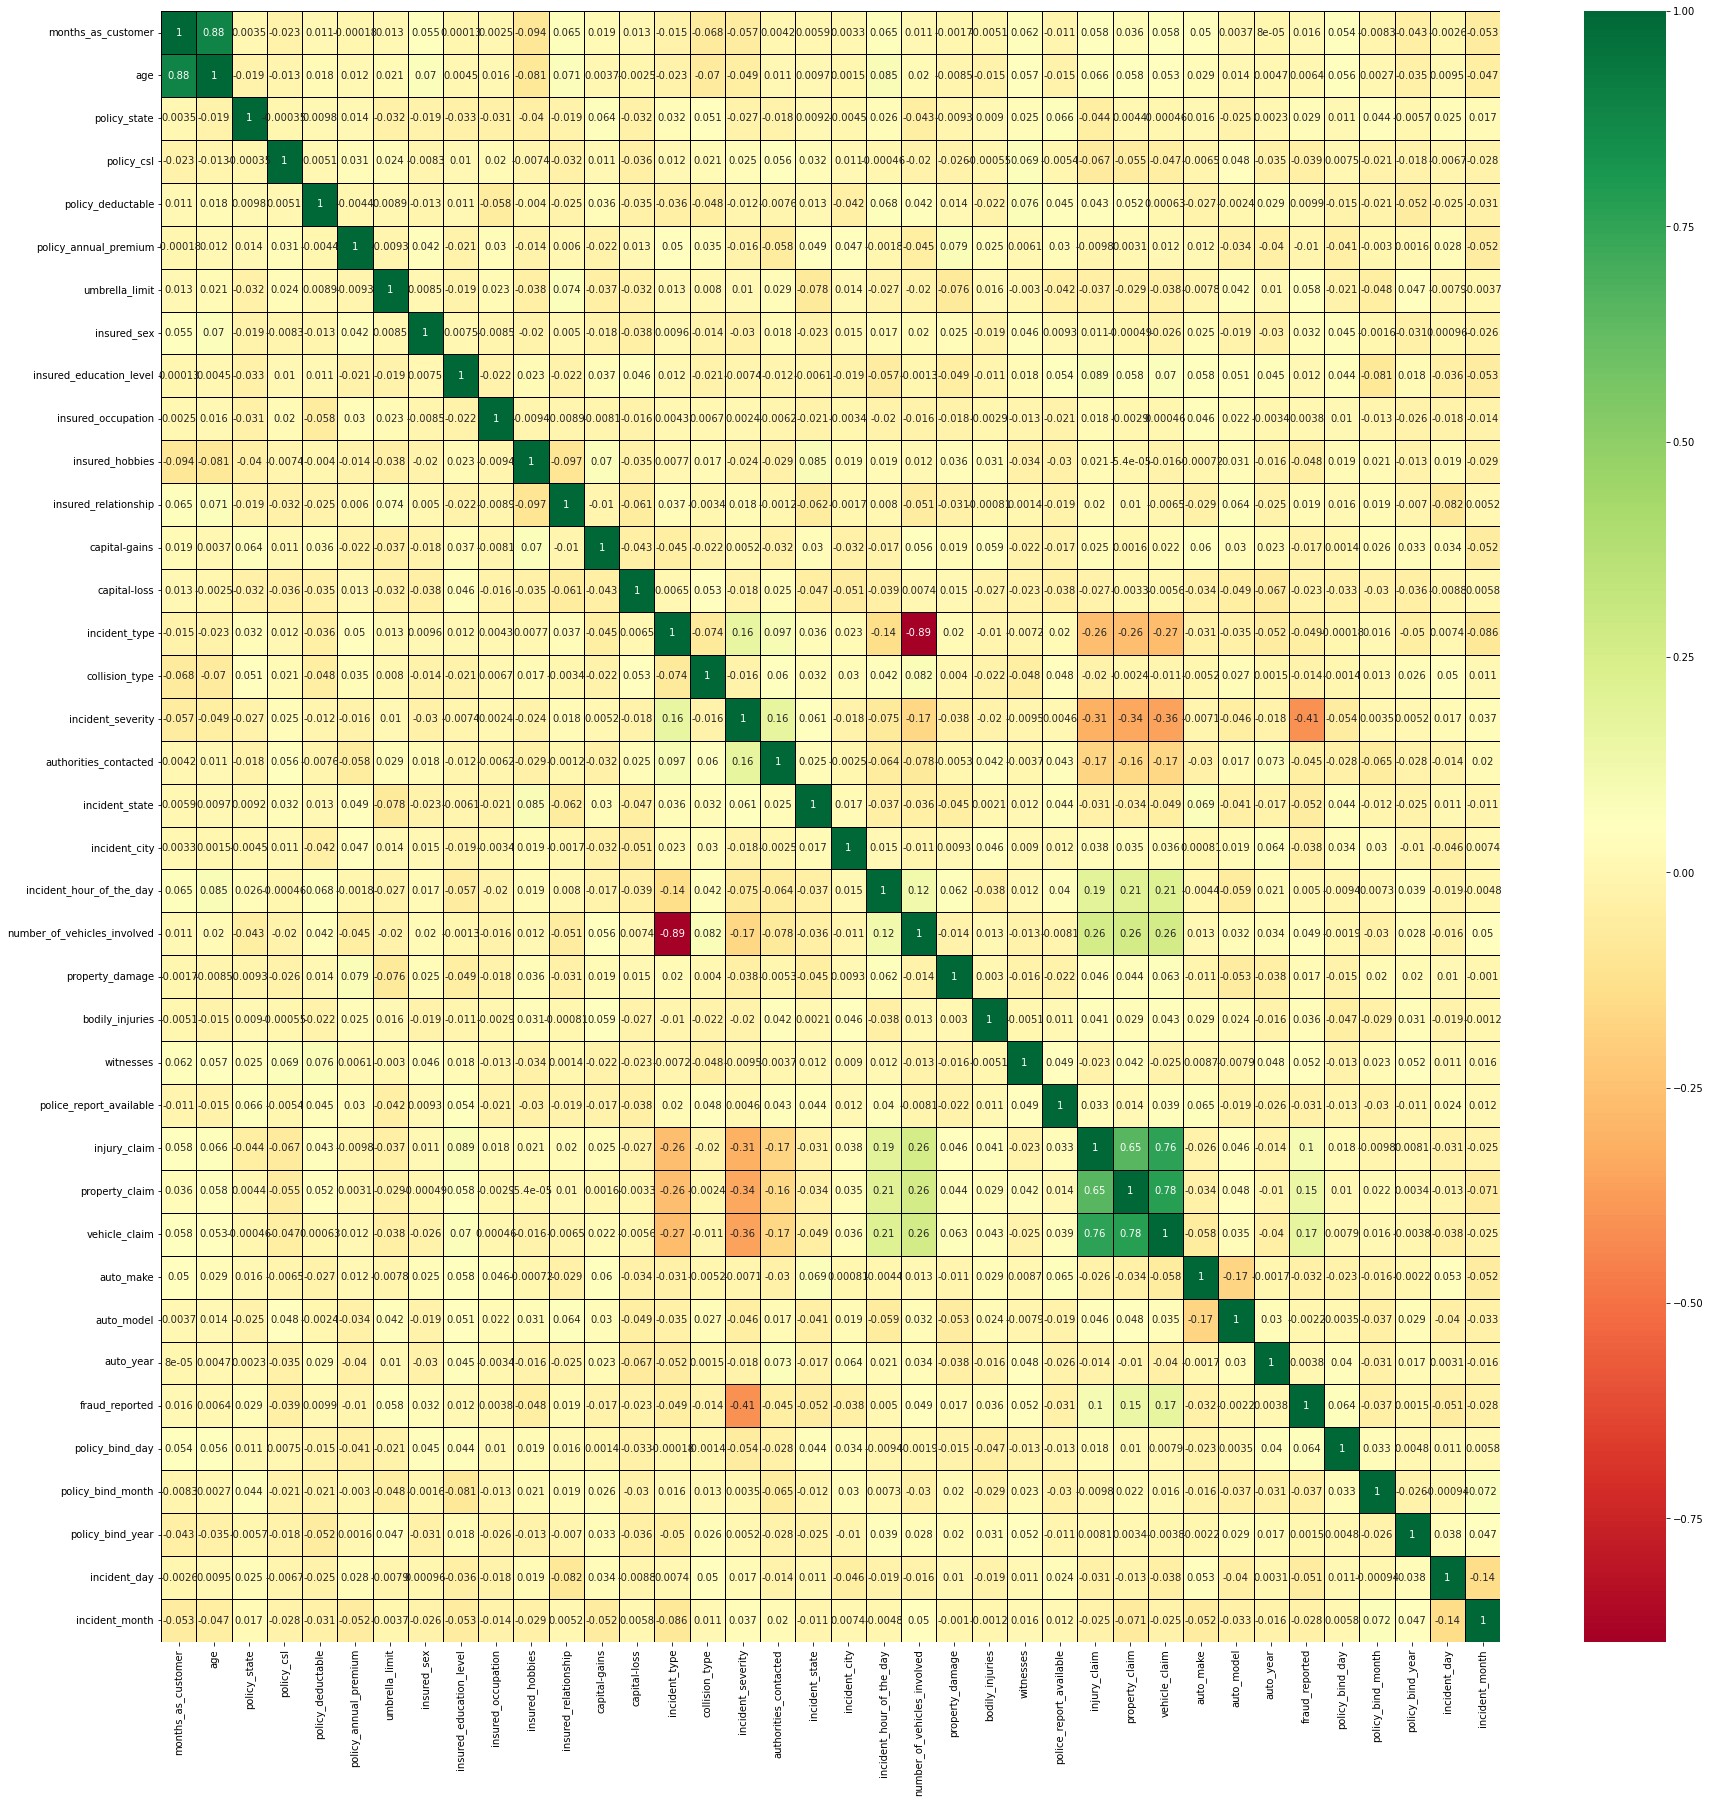

In [51]:
df=df.drop('total_claim_amount',axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',cmap="RdYlGn")
plt.show()

In [52]:
# incident_type and numberof vehicles involved features are highly negative correlated with each other..i m going to delete incident_type feature..

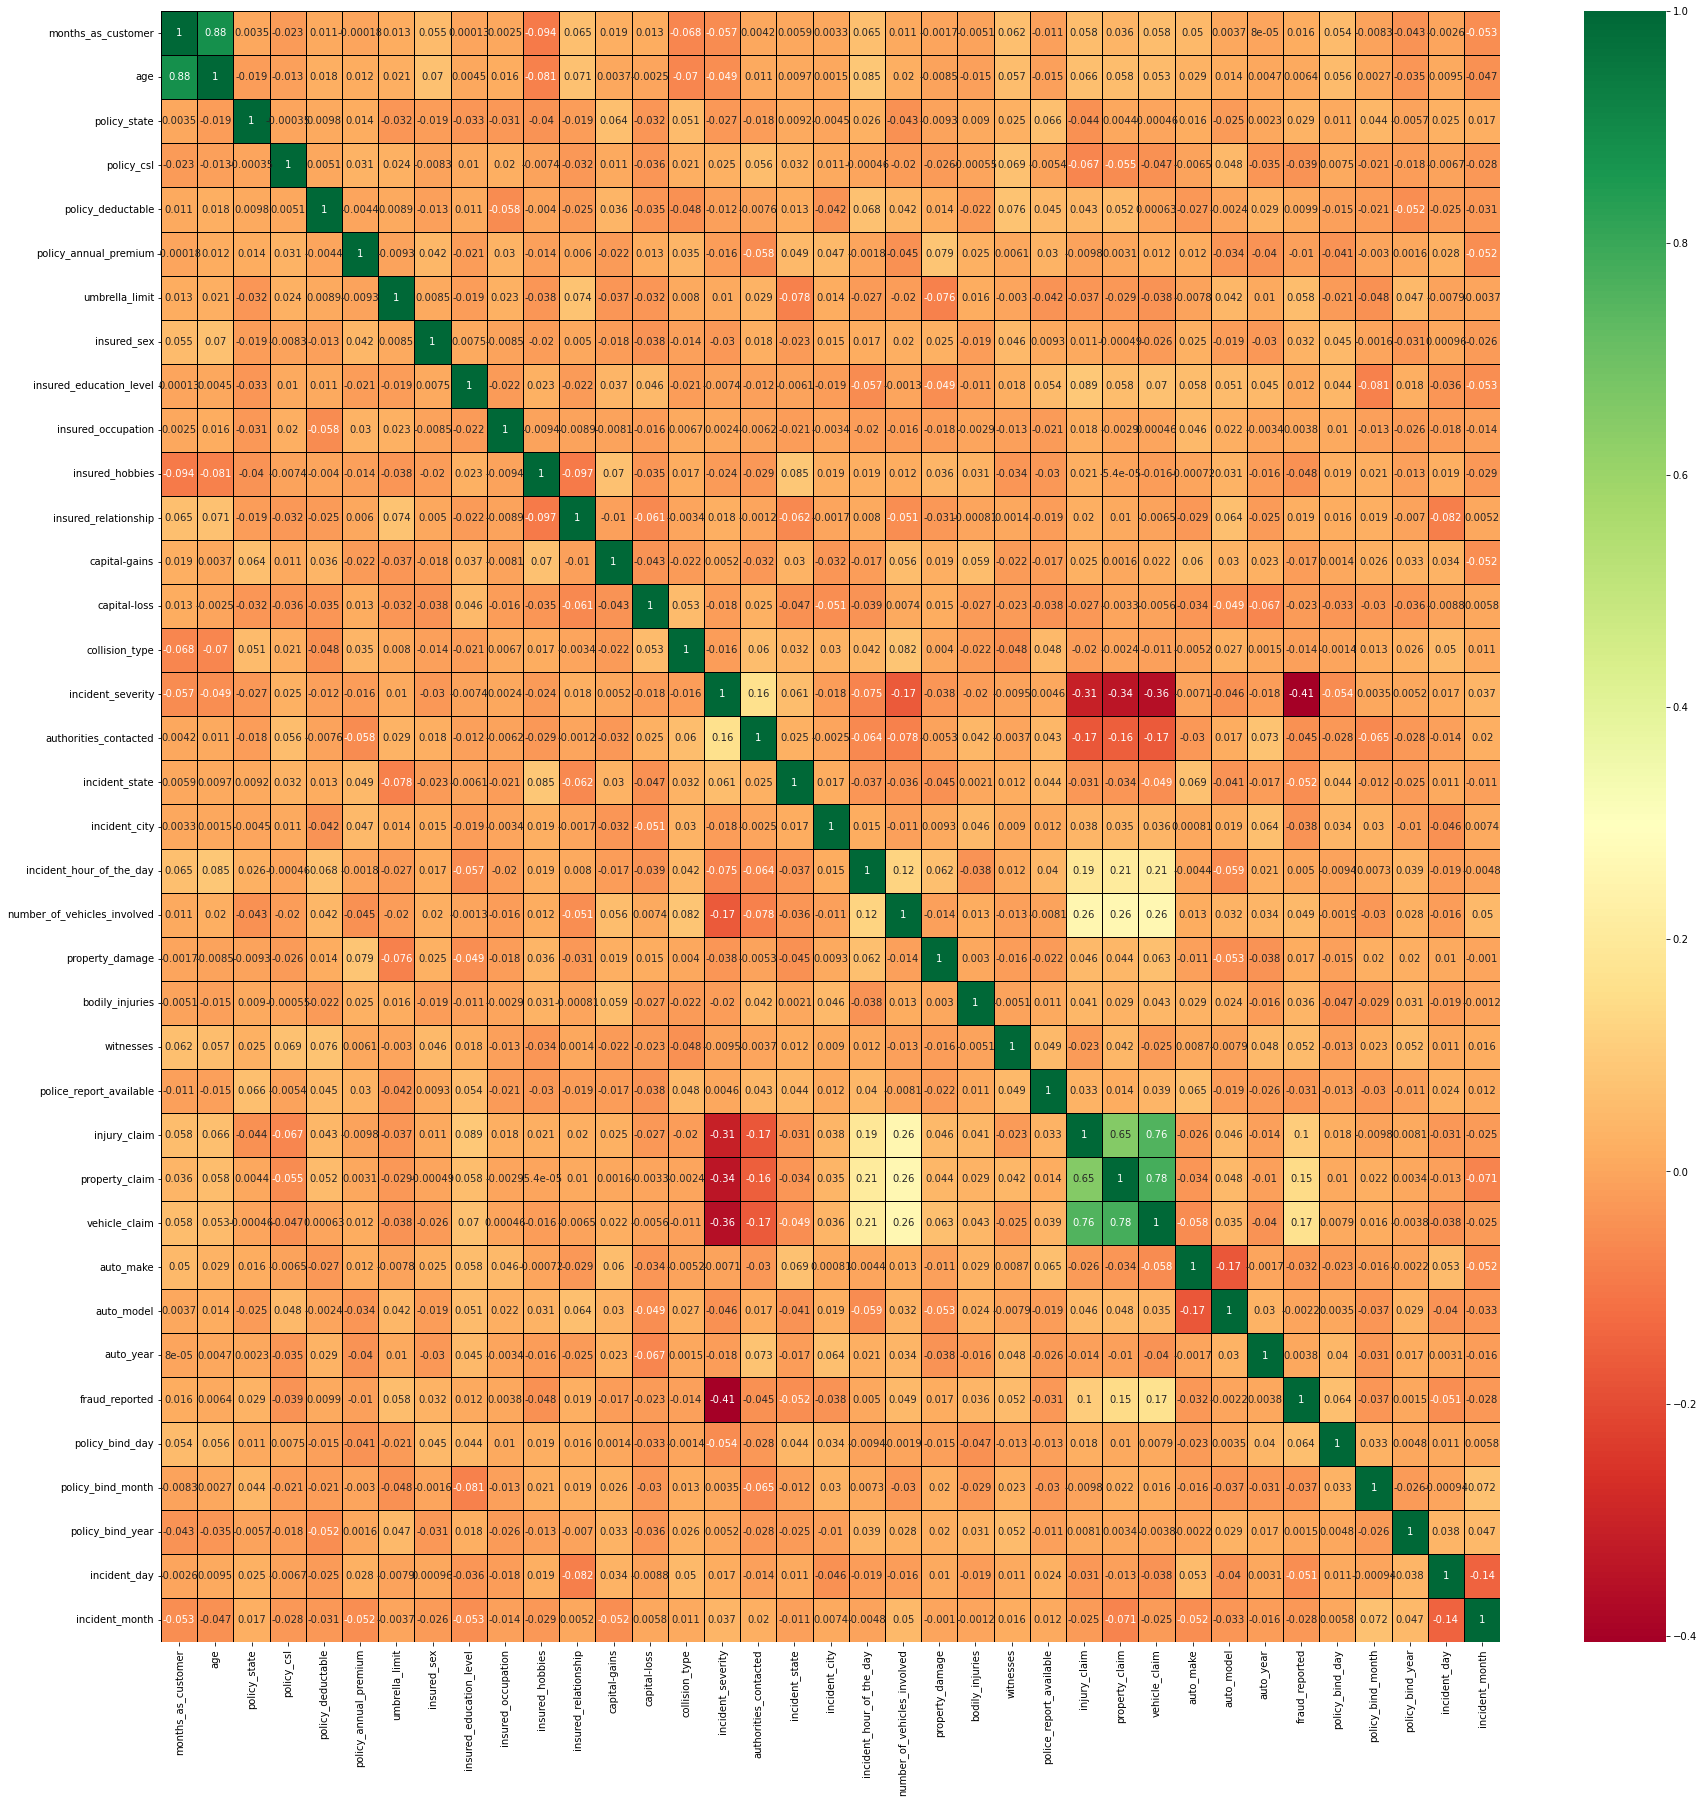

In [53]:
df=df.drop('incident_type',axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',cmap="RdYlGn")
plt.show()

In [54]:
# age and months as customer feature are highly correlated with each other..ot of which, age will be deleted..

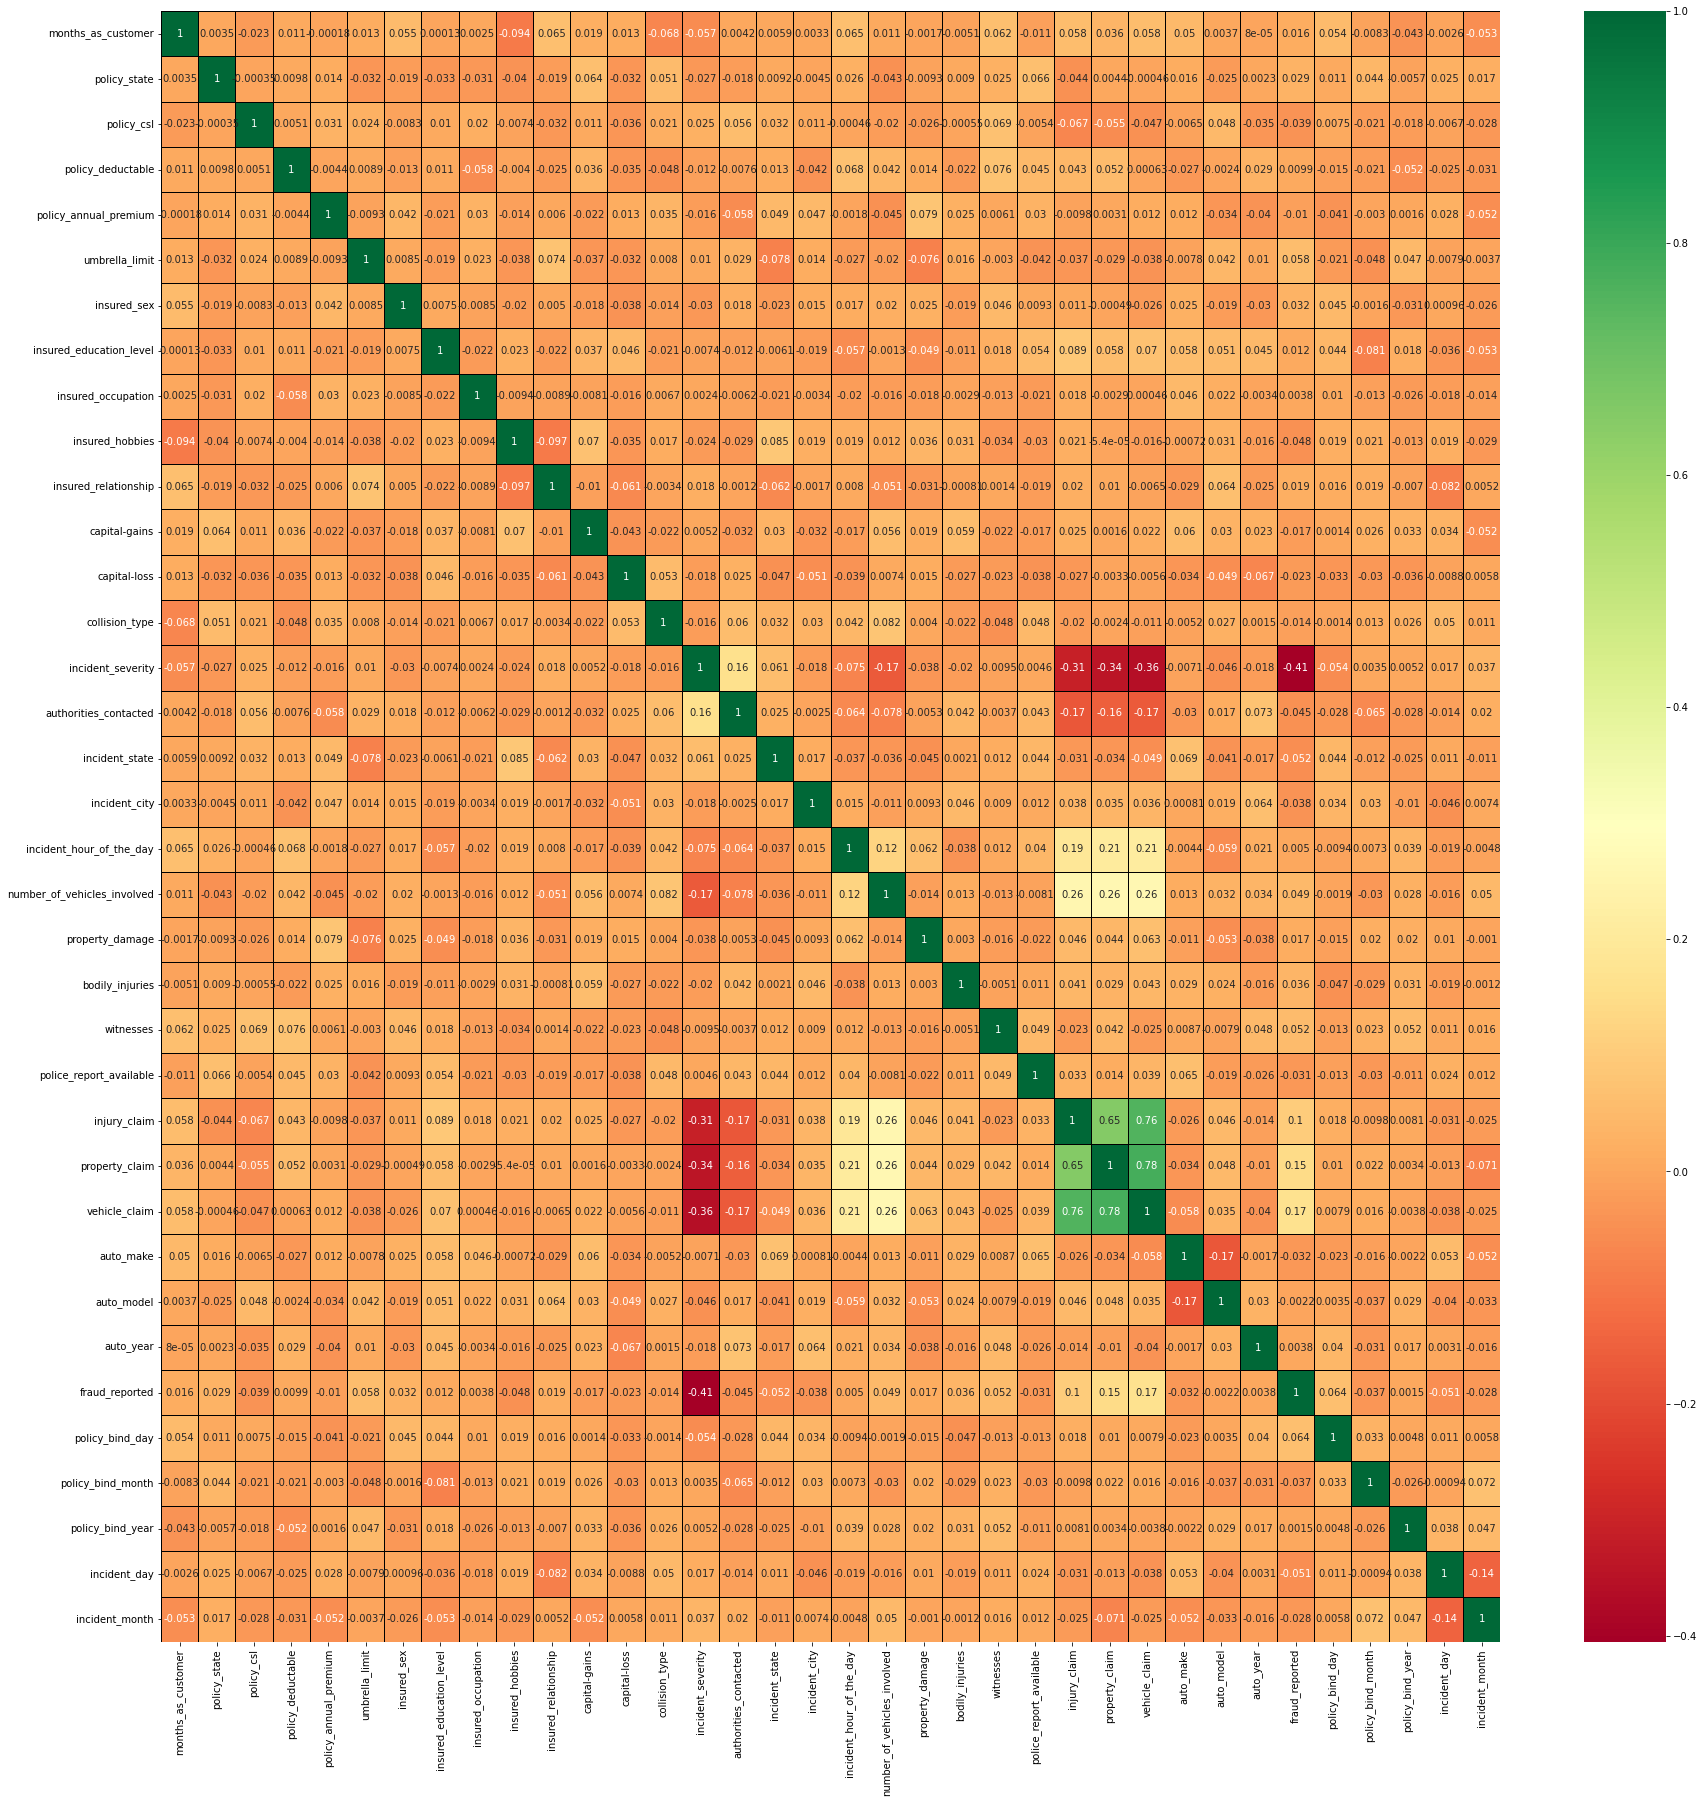

In [55]:
df=df.drop('age',axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',cmap="RdYlGn")
plt.show()

In [56]:
# now, let's check other features based on vif values...

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def vif_check (df):
    x=df.drop('fraud_reported',axis=1)
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    vif=vif.sort_values(by='vif',ascending = False)
    print(vif)

In [61]:
vif_check(df)

         vif                     features
34  8.757953               incident_month
23  8.722941      police_report_available
13  8.694531               collision_type
20  8.252353              property_damage
19  4.681110  number_of_vehicles_involved
31  4.464602            policy_bind_month
18  4.107397     incident_hour_of_the_day
28  4.087373                   auto_model
30  4.054797              policy_bind_day
9   3.979496              insured_hobbies
33  3.976157                 incident_day
29  3.858863                    auto_year
27  3.771493                    auto_make
26  3.652667                vehicle_claim
8   3.635929           insured_occupation
32  3.513118             policy_bind_year
7   3.362062      insured_education_level
16  3.316635               incident_state
15  3.217707        authorities_contacted
17  3.139334                incident_city
10  3.057098         insured_relationship
14  3.035089            incident_severity
22  2.875899                    wi

In [62]:
# incident_month will be dropped..

In [63]:
df=df.drop('incident_month',axis=1)
vif_check(df)

         vif                     features
13  8.640529               collision_type
23  8.614902      police_report_available
20  8.119833              property_damage
19  4.583999  number_of_vehicles_involved
31  4.362134            policy_bind_month
18  4.099224     incident_hour_of_the_day
28  4.082030                   auto_model
30  4.034688              policy_bind_day
9   3.973764              insured_hobbies
33  3.954397                 incident_day
29  3.851919                    auto_year
27  3.770535                    auto_make
26  3.645362                vehicle_claim
8   3.621936           insured_occupation
32  3.478260             policy_bind_year
7   3.361170      insured_education_level
16  3.307297               incident_state
15  3.209582        authorities_contacted
17  3.132899                incident_city
10  3.041364         insured_relationship
14  3.016554            incident_severity
22  2.864339                    witnesses
25  2.676659               propert

In [64]:
# collision_type will be deleted.. it also has very less correlation with target variable..

In [65]:
df=df.drop('collision_type',axis=1)
vif_check(df)

         vif                     features
22  8.493127      police_report_available
19  8.044040              property_damage
18  4.475285  number_of_vehicles_involved
30  4.331841            policy_bind_month
17  4.069406     incident_hour_of_the_day
27  4.050789                   auto_model
29  4.026832              policy_bind_day
9   3.960060              insured_hobbies
32  3.912939                 incident_day
28  3.844979                    auto_year
26  3.764496                    auto_make
25  3.645339                vehicle_claim
8   3.606930           insured_occupation
31  3.465060             policy_bind_year
7   3.357891      insured_education_level
15  3.286406               incident_state
14  3.180292        authorities_contacted
16  3.120421                incident_city
10  3.026302         insured_relationship
13  3.015707            incident_severity
21  2.862856                    witnesses
24  2.676472               property_claim
1   2.502601                 polic

In [66]:
df=df.drop('police_report_available',axis=1)
vif_check(df)

         vif                     features
19  7.969855              property_damage
18  4.454081  number_of_vehicles_involved
29  4.318233            policy_bind_month
17  4.033130     incident_hour_of_the_day
26  4.028779                   auto_model
28  4.016935              policy_bind_day
9   3.956586              insured_hobbies
31  3.875218                 incident_day
27  3.843360                    auto_year
25  3.706482                    auto_make
24  3.632728                vehicle_claim
8   3.596071           insured_occupation
30  3.459394             policy_bind_year
7   3.312751      insured_education_level
15  3.256721               incident_state
14  3.146969        authorities_contacted
16  3.109623                incident_city
10  3.014442         insured_relationship
13  3.002792            incident_severity
21  2.843022                    witnesses
23  2.668668               property_claim
22  2.493710                 injury_claim
1   2.469202                 polic

In [67]:
# property_damage will be deleted.. it also has very less correlation with target variable..

In [68]:
df=df.drop('property_damage',axis=1)
vif_check(df)

         vif                     features
18  4.431362  number_of_vehicles_involved
28  4.248561            policy_bind_month
25  4.016558                   auto_model
27  3.996698              policy_bind_day
17  3.967616     incident_hour_of_the_day
9   3.893781              insured_hobbies
26  3.836023                    auto_year
30  3.829859                 incident_day
24  3.683076                    auto_make
23  3.618172                vehicle_claim
8   3.571685           insured_occupation
29  3.423486             policy_bind_year
7   3.308297      insured_education_level
15  3.254685               incident_state
14  3.121691        authorities_contacted
16  3.093156                incident_city
10  2.996606         insured_relationship
13  2.992373            incident_severity
20  2.839141                    witnesses
22  2.665254               property_claim
21  2.493080                 injury_claim
1   2.461287                 policy_state
19  2.459338              bodily_i

In [69]:
# hence, multicollinearity removed...

In [70]:
# let's check best features by using selectkbest...

In [71]:
from sklearn.feature_selection import SelectKBest,f_classif

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
cont_cols

['months_as_customer',
 'age',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [74]:
cont_cols.remove('age')
cont_cols.remove('total_claim_amount')
cont_cols

['months_as_customer',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [75]:
for i in cont_cols:
    df[i]=scaler.fit_transform(df[[i]])
df

months_as_customer  policy_state  policy_csl  policy_deductable  \
0              1.048111             2           1                  1   
1              0.299944             1           1                  2   
2             -0.517093             2           0                  2   
3              0.519147             0           1                  2   
4              0.299944             0           2                  1   
..                  ...           ...         ...                ...   
990           -2.294193             2           2                  1   
991            0.737662             0           0                  1   
992           -0.555624             2           1                  0   
993            1.911364             0           2                  2   
994            1.898781             2           1                  1   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                 0.625071               1            1   
1                -0.244183               5            1   
2                 0.650750               5            0   
3                 0.661465               6            0   
4                 1.351677               6            1   
..                     ...             ...          ...   
990               0.227874               1            0   
991               0.748162               1            0   
992               0.528463               3            0   
993               0.418722               5            1   
994              -2.067775               1            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
990                        5                   2               13   
991                        6                   9               17   
992                        5                   1                3   
993                        0                   5                0   
994                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_severity  \
0                       0       1.035971      1.048757                  0   
1                       2      -0.979942      1.048757                  1   
2                       3       0.963538      1.048757                  1   
3                       4       1.021062     -1.006357                  0   
4                       4       1.072883     -0.941696                  1   
..                    ...            ...           ...                ...   
990                     4      -0.979942      1.048757                  1   
991                     5       1.085230      1.048757                  0   
992                     2       0.963538      1.048757                  1   
993                     5      -0.979942      1.048757                  0   
994                     0      -0.979942      1.048757                  1   

     authorities_contacted  incident_state  incident_city  \
0                        4               4              1   
1                        4               5              5   
2                        4               1              1   
3                        4               2              0   
4                        2               1              0   
..                     ...             ...            ...   
990                      1               0              4   
991                      1               4              3   
992                      4               0              0   
993                      3               1              0   
994   

In [76]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [82]:
def skb(x,y,k):
    bestt=SelectKBest(score_func=f_classif,k=k)
    ss=bestt.fit(x,y)
    df_skb=pd.DataFrame({'Features':x.columns,'Scores':ss.scores_})
    df_skb=df_skb.sort_values(by='Scores',ascending=False)
    print(df_skb)

In [83]:
skb(x,y,10)

                       Features      Scores
13            incident_severity  195.382077
23                vehicle_claim   29.295983
22               property_claim   21.842994
21                 injury_claim   10.289089
27              policy_bind_day    4.022988
5                umbrella_limit    3.307776
15               incident_state    2.709810
20                    witnesses    2.705624
30                 incident_day    2.604226
18  number_of_vehicles_involved    2.420065
9               insured_hobbies    2.319358
14        authorities_contacted    1.973917
2                    policy_csl    1.494464
16                incident_city    1.416372
28            policy_bind_month    1.354346
19              bodily_injuries    1.304768
24                    auto_make    1.023507
6                   insured_sex    0.996104
1                  policy_state    0.827670
12                 capital-loss    0.513615
10         insured_relationship    0.341662
11                capital-gains 

In [84]:
skb(x,y,11)

                       Features      Scores
13            incident_severity  195.382077
23                vehicle_claim   29.295983
22               property_claim   21.842994
21                 injury_claim   10.289089
27              policy_bind_day    4.022988
5                umbrella_limit    3.307776
15               incident_state    2.709810
20                    witnesses    2.705624
30                 incident_day    2.604226
18  number_of_vehicles_involved    2.420065
9               insured_hobbies    2.319358
14        authorities_contacted    1.973917
2                    policy_csl    1.494464
16                incident_city    1.416372
28            policy_bind_month    1.354346
19              bodily_injuries    1.304768
24                    auto_make    1.023507
6                   insured_sex    0.996104
1                  policy_state    0.827670
12                 capital-loss    0.513615
10         insured_relationship    0.341662
11                capital-gains 

In [85]:
skb(x,y,12)

                       Features      Scores
13            incident_severity  195.382077
23                vehicle_claim   29.295983
22               property_claim   21.842994
21                 injury_claim   10.289089
27              policy_bind_day    4.022988
5                umbrella_limit    3.307776
15               incident_state    2.709810
20                    witnesses    2.705624
30                 incident_day    2.604226
18  number_of_vehicles_involved    2.420065
9               insured_hobbies    2.319358
14        authorities_contacted    1.973917
2                    policy_csl    1.494464
16                incident_city    1.416372
28            policy_bind_month    1.354346
19              bodily_injuries    1.304768
24                    auto_make    1.023507
6                   insured_sex    0.996104
1                  policy_state    0.827670
12                 capital-loss    0.513615
10         insured_relationship    0.341662
11                capital-gains 

In [86]:
selected_featurs=['incident_severity','vehicle_claim','property_claim','injury_claim','policy_bind_day','umbrella_limit','incident_state','witnesses','incident_day','number_of_vehicles_involved','insured_hobbies','authorities_contacted']

In [87]:
df_sel=pd.DataFrame()
for i in selected_featurs:
    df_sel[i]=df[i]
df_sel['fraud_reported']=df['fraud_reported']
df_sel

incident_severity  vehicle_claim  property_claim  injury_claim  \
0                    0       0.754862        1.088320      0.008290   
1                    1      -1.786644       -1.558326     -1.523640   
2                    1      -0.819535       -0.577412      0.226269   
3                    0       0.678811       -0.033069     -0.024224   
4                    1      -1.739916       -1.622969     -1.302102   
..                 ...            ...             ...           ...   
990                  1       1.259994        0.406689      1.639519   
991                  0       1.904962        1.777199      1.718069   
992                  1       0.778382        0.188632      0.190720   
993                  0      -0.102780       -0.264047     -0.248768   
994                  1      -1.779079       -1.493607     -1.694518   

     policy_bind_day  umbrella_limit  incident_state  witnesses  incident_day  \
0                 17               1               4          2            25   
1                 27               5               5          0            21   
2                  6               5               1          3            22   
3                 25               6               2          2            10   
4                  6               6               1          1            17   
..               ...             ...             ...        ...           ...   
990               16               1               0          1            22   
991                5               1               4          3            24   
992               17               3               0          3            23   
993               18               5               1          1            26   
994               11               1               6          3            26   

     number_of_vehicles_involved  insured_hobbies  authorities_contacted  \
0                              1               17                      4   
1                              1               15                      4   
2                              3                2                      4   
3                              1                2                      4   
4                              1                2                      2   
..                           ...              ...                    ...   
990                            1               13                      1   
991                            1               17                      1   
992                            3                3                      4   
993                            1                0                      3   
994                            1               11                      4   

     fraud_reported  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0  
..              ...  
990               0  
991               0  
992               0  
993               0  
994               0  

[995 rows x 13 columns]

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

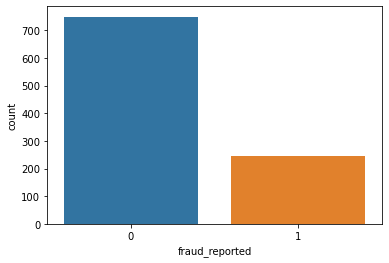

In [88]:
sns.countplot(df_sel['fraud_reported'])

In [89]:
# hence, it's an imbalancing case.. let's use SMOTE in this case..

In [90]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(0.9)

In [91]:
x1=df_sel.drop('fraud_reported',axis=1)
y1=df_sel['fraud_reported']
xcl,ycl=sm.fit_resample(x1,y1)
print(xcl)
print(ycl)

      incident_severity  vehicle_claim  property_claim  injury_claim  \
0                     0       0.754862        1.088320      0.008290   
1                     1      -1.786644       -1.558326     -1.523640   
2                     1      -0.819535       -0.577412      0.226269   
3                     0       0.678811       -0.033069     -0.024224   
4                     1      -1.739916       -1.622969     -1.302102   
...                 ...            ...             ...           ...   
1418                  0      -0.323859       -0.300464     -0.417404   
1419                  0       0.827151        0.076585      1.167000   
1420                  0      -0.417358        0.219022     -0.558709   
1421                  0       1.547976        1.869076      1.771168   
1422                  0       0.360076       -0.121679      0.882875   

      policy_bind_day  umbrella_limit  incident_state  witnesses  \
0                  17               1               4          2   

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

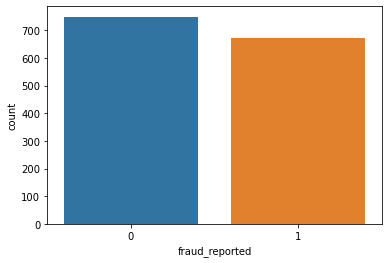

In [92]:
sns.countplot(ycl)

In [93]:
ycl.value_counts()

0    749
1    674
Name: fraud_reported, dtype: int64

In [94]:
# imbalancing removed..

In [95]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,plot_roc_curve, plot_confusion_matrix
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [100]:
def algo_class_check (x,y,algo):
    max_acc=0
    max_i=0
    for i in range(200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = i)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        acc= accuracy_score(y_test,y_pred)
        if acc> max_acc:
            max_acc=acc
            max_i = i
            i+=1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = max_i)
    algo.fit(x_train,y_train)
    y_pred = algo.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    cvs=cross_val_score(algo,x_train,y_train,cv=7,scoring='accuracy')
    ac=cvs.mean()
    print(f'''for algo {algo}, the maximum accuracy is {max_acc} ,\n classification report is : \n {classification_report(y_test,y_pred)} ,\nconfusion matrix is {plot_confusion_matrix(algo,x,y)}
    \n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n roc curve is :{plot_roc_curve(algo,x,y)} \n at random_state {max_i} \n and cross validation score is {ac}''') 
 

In [97]:
lc=LogisticRegression()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

for algo LogisticRegression(), the maximum accuracy is 0.8370786516853933 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       191
           1       0.81      0.85      0.83       165

    accuracy                           0.84       356
   macro avg       0.84      0.84      0.84       356
weighted avg       0.84      0.84      0.84       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000017049812C40>
    
 roc_auc_score is : 0.8378549896874504 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000017049812C40> 
 at random_state 39 
 and cross validation score is 0.769405130473242


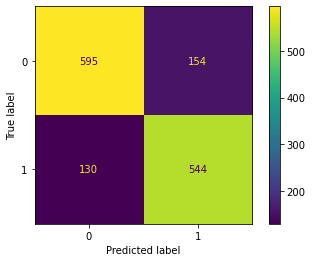

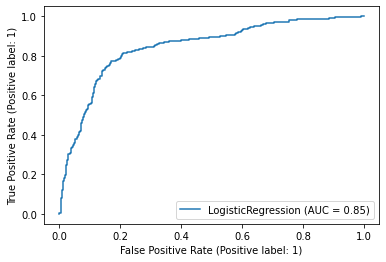

In [101]:
algo_class_check(xcl,ycl,lc)

for algo KNeighborsClassifier(), the maximum accuracy is 0.7584269662921348 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       199
           1       0.67      0.89      0.77       157

    accuracy                           0.76       356
   macro avg       0.78      0.77      0.76       356
weighted avg       0.79      0.76      0.76       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000170518C4E80>
    
 roc_auc_score is : 0.7724930384406107 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000017051954EB0> 
 at random_state 87 
 and cross validation score is 0.6897759103641457


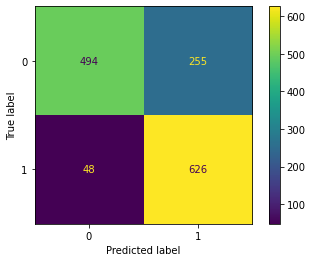

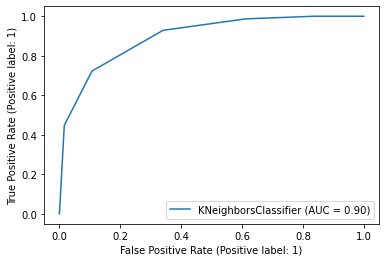

In [102]:
algo_class_check(xcl,ycl,knc)

for algo DecisionTreeClassifier(), the maximum accuracy is 0.8876404494382022 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       187
           1       0.85      0.89      0.87       169

    accuracy                           0.88       356
   macro avg       0.88      0.88      0.88       356
weighted avg       0.88      0.88      0.88       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000170505D0C10>
    
 roc_auc_score is : 0.8772268455526374 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000170505D0C10> 
 at random_state 2 
 and cross validation score is 0.7975883335790456


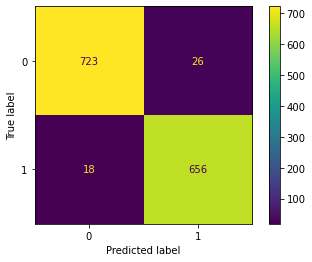

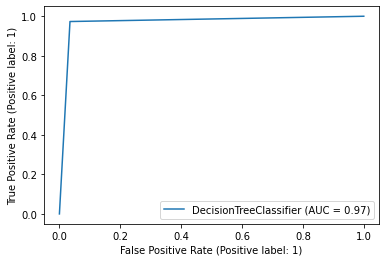

In [103]:
algo_class_check(xcl,ycl,dtc)

for algo AdaBoostClassifier(), the maximum accuracy is 0.8848314606741573 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       194
           1       0.88      0.87      0.87       162

    accuracy                           0.88       356
   macro avg       0.88      0.88      0.88       356
weighted avg       0.88      0.88      0.88       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000170519C1FD0>
    
 roc_auc_score is : 0.8836387934326079 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000170504BCEE0> 
 at random_state 76 
 and cross validation score is 0.8163116123642441


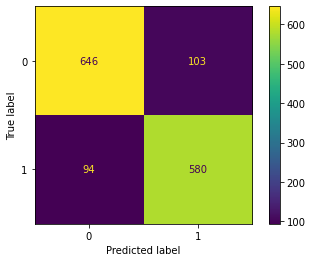

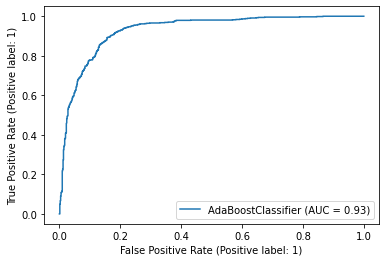

In [104]:
algo_class_check(xcl,ycl,abc)

for algo RandomForestClassifier(), the maximum accuracy is 0.9101123595505618 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       194
           1       0.90      0.91      0.90       162

    accuracy                           0.91       356
   macro avg       0.91      0.91      0.91       356
weighted avg       0.91      0.91      0.91       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000017050535370>
    
 roc_auc_score is : 0.909889270714013 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000001705039EEB0> 
 at random_state 76 
 and cross validation score is 0.8669160646714825


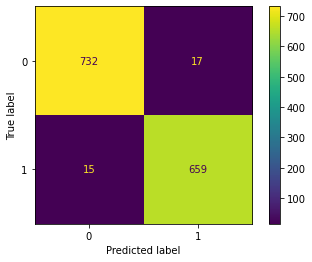

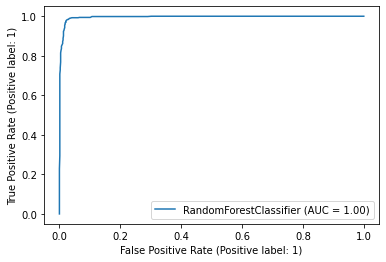

In [105]:
algo_class_check(xcl,ycl,rfc)

for algo SVC(), the maximum accuracy is 0.8258426966292135 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       187
           1       0.78      0.88      0.83       169

    accuracy                           0.83       356
   macro avg       0.83      0.83      0.83       356
weighted avg       0.83      0.83      0.83       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000170503D9AC0>
    
 roc_auc_score is : 0.8282441540360093 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x00000170517776D0> 
 at random_state 78 
 and cross validation score is 0.7234814978623029


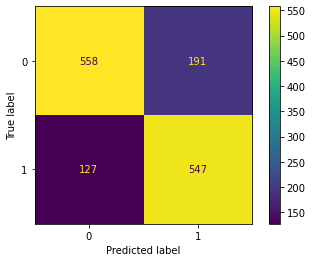

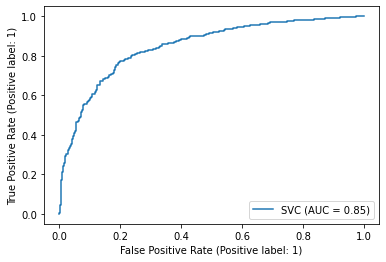

In [106]:
algo_class_check(xcl,ycl,svc)

for algo XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...), the maximum accuracy is 0.9129213483146067 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       173
           1       0.93      0.90      0.91       183

    accuracy                           0.91       35

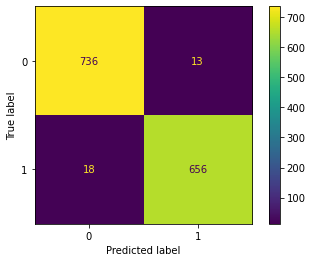

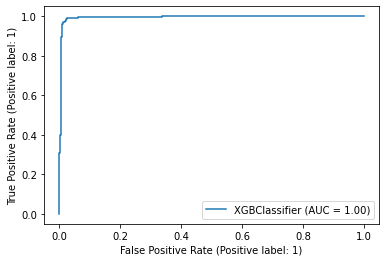

In [107]:
algo_class_check(xcl,ycl,xgb)

In [108]:
# RandomForestClassifier is the best algo according to our model.. it's giving accuracy 0.91 with 0.86 cross validation score and roc_auc_score to be 0.91.
# although, xgbclassifier is also giving the same results but in case of fraud detection, FalseNegative should be as low as possible.
# and in rfc, fn =15 only whereas in xgb, it's higher = 18. that's why i m going to finalize rfc.. 

for algo Random Forest Classifier,
the accuracy is 0.9129213483146067 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       194
           1       0.91      0.90      0.90       162

    accuracy                           0.91       356
   macro avg       0.91      0.91      0.91       356
weighted avg       0.91      0.91      0.91       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000170503B7490>
    
 roc_auc_score is : 0.9119574901361843 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000017051656FD0> 
 and cross validation score is 0.861264681311121


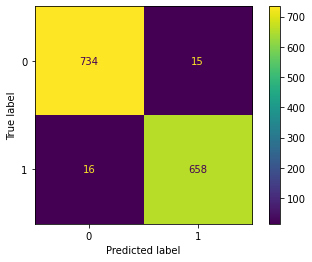

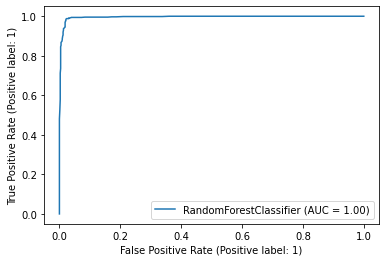

In [109]:
x_train,x_test,y_train,y_test = train_test_split(xcl,ycl,test_size=0.25,random_state = 76)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
acc= accuracy_score(y_test,y_pred)
cvs=cross_val_score(rfc,x_train,y_train,cv=7,scoring='accuracy')
ac=cvs.mean()
print(f'''for algo Random Forest Classifier,\nthe accuracy is {acc} ,\n classification report is : \n {classification_report(y_test,y_pred)} ,\nconfusion matrix is {plot_confusion_matrix(rfc,xcl,ycl)}
    \n roc_auc_score is : {roc_auc_score(y_test,y_pred)} \n roc curve is :{plot_roc_curve(rfc,xcl,ycl)} \n and cross validation score is {ac}''') 
 

In [110]:
# let's hypertune this.

In [111]:
from sklearn.model_selection import GridSearchCV

In [113]:
params={'criterion':['gini','impurity','log_loss'],'max_depth':[7,9,11,12],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2],'max_features':['sqrt','log2'],'min_impurity_decrease':[0.0,0.1,0.2,0.3]}
grid = GridSearchCV(rfc,param_grid=params,cv=5,n_jobs=-1)
grid.fit(xcl,ycl)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

for algo Random Forest Classifier,
the accuracy is 0.9213483146067416 ,
 classification report is : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       194
           1       0.90      0.93      0.92       162

    accuracy                           0.92       356
   macro avg       0.92      0.92      0.92       356
weighted avg       0.92      0.92      0.92       356
 ,
confusion matrix is <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000170539DC040>
    
 roc_auc_score is : 0.9222349497263587 
 roc curve is :<sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000017053CF9D30> 
 and cross validation score is 0.856596147230822


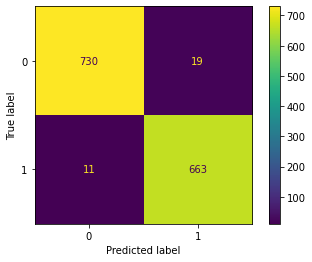

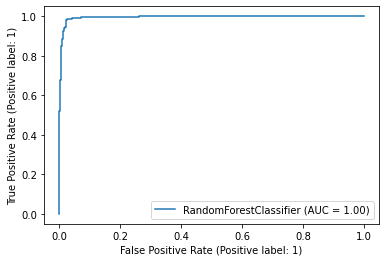

In [114]:
rfc1=RandomForestClassifier(criterion='gini',max_depth=12,max_features='log2',min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2)
rfc1.fit(x_train,y_train)
y_pred = rfc1.predict(x_test)
acc= accuracy_score(y_test,y_pred)
cvs=cross_val_score(rfc1,x_train,y_train,cv=7,scoring='accuracy')
ac=cvs.mean()
cl=classification_report(y_test,y_pred)
cm=plot_confusion_matrix(rfc1,xcl,ycl)
score=roc_auc_score(y_test,y_pred)
curve=plot_roc_curve(rfc1,xcl,ycl)
print(f'''for algo Random Forest Classifier,\nthe accuracy is {acc} ,\n classification report is : \n {cl} ,\nconfusion matrix is {cm}
    \n roc_auc_score is : {score} \n roc curve is :{curve} \n and cross validation score is {ac}''') 
 

In [115]:
# FalseNegative values decreases from 15 to 11.. hence, improved...

In [116]:
# saving the model..

In [117]:
import pickle
filename='Insurance_Fraud_Detection_Evaluation_Project'
pickle.dump(rfc1,open(filename,'wb'))

In [118]:
#CONCLUSION
# 1).HERE, I FOUND CLASS OF TARGET FRAUD_REPORTED. IT HAS TWO CLASSES ONLY- Yes or No (i.e. 0 or 1).
# 2).IT'S A CLASSIFICATION PROBLEM WITH IMBALANCING PROBLEM OF TARGET VARIABLE.
# 3).FIRSTLY, I CHECKED ALL OF THE FEATURES AS IT HAS 44 FEATURES SO CLASSIFIED THEM
# INTO CONTINUOUS, ENCODED (MEANS WHICH ARE CATEGORICAL COLUMNS BUT NEED NOT TO BE ENCODED AS THEY HAVE ONLY
# TWO OR THREE CLASSES 0,1,2 ETC.) AND CATEGORICAL COLUMNS.
# 4).ALSO, THERE WAS 1 ID COLUMN WHICH HAD NOTHING TO DO WITH MY MODEL. ALSO, THERE WERE SOME COLUMNS WHICH HAVE ALL
# NAN VALUES. SO, DELETED THEM. AND THERE WERE SOME COLUMNS WHICH WERE HAVING IRRELEVANT INFORMATION LIKE ZIPCODE ETC.
# SO DELETED THEM.
# 5).ALSO, THERE WERE SOME COLUMNS WHICH WERE HAVING '?' AS THEIR VALUES SO FIRSTLY, ENCODED THEM AND THEN REPLACED
# THEIR ENCODED VALUES (0) BY SOME THEIR MODE VALUES.
# 6).ALSO USED LABEL ENCODER TO ENCODE CATEGORICAL COLUMNS.
# 7).THEN I CHECKED IF THERE IS SOME FEATURE WHICH HAS NO RELATION WITH THE TARGET VARIABLE BY PLOTTING SCATTER PLOT
# BETWEEN ALL FEATURES AND TARGET VARIABLE AND FOUND THAT BASIS ON THIS PLOT, NO FEATURE COULD BE DELETED.
# 8).THEN I REMOVED OUTLIERS BASED ON ZSCORES.
# 9).THEN SKEWNESS REMOVED USING POWER TRANFORMER WITH YEO-JOHNSON METHOD
# 10).THEN DELETED SOME FEATURES BASED ON VIF VALUES AND HENCE, REMOVED MULTICOLLINEARITY.
# 11).THEN DONE SCALING ON THE X BY USING STANDARD SCALER.
# 12).THEN SELECTED TOP 12 FEATURES USING SELECTKBEST METHOD AND F_CLASSIF AS SCORE_FUNCTION.
# 13).AS IT'S IMBALANCING CASE, SO I USED SMOTE WITH 0.9 AND HENCE, IMBALANCING OF TARGET VARIABLE WAS TACKLED.
# 14).I CHECKED MY MODEL WITH DIFFERENT ALGOS AND CAME TO THE CONCLUSION THAT
#  ACC. TO MY MODEL, RANDOM FOREST CLASSIFIER ALGO IS THE BEST ALGO.
# 15).THE ACCURACY IN TERMS OF ACCURACY_SCORE I GOT IS IN THE RANGE OF 91% ALONG WITH
# ROC_AUC_SCORE TO BE 91% AND 86% CROSS_VAL_SCORE. ALTHOUGH, I FOUND SAME ACCURACY AND CVS SCORE IN XGBCLASSIFIER
# BUT THE ADVANTAGE OF FINALIZING RFC WAS BECAUSE OF ITS LOWER FALSENEGATIVE VALUES (15) AS COMPARED TO THOSE 
# OF XGBCLASSIFIER(18). AS FN IS THE MOST IMPORTANT PARAMETER TO CONSIDER IN CASE OF FRAUD DETECTION
# AND IT WOULD BE AS LESS AS POSSIBLE SO, I FINALIZED RFC FOR MY MODEL.
# 16).ON CHECKING BY GRIDSEARCHCV, I FOUND THAT GRIDSEARCHCV IMPROVED MY MODEL WITH DECRESE IN FALSENEGATIVE VALUES
# TO 11 AND INCREASED ACCURACY TO UPTO 92% WITH ROC_AUC_SCORE 92% AND ALSO CROSS_VAL_SCORE TO UPTO 85.6%. 
# 17). HENCE, I FINALIZED MY MODEL WITH RANDOMFORESTCLASSIFIER WITH ITS HYPERTUNED PARAMETERS GIVEN BY 
# GRID SEARCH CV.
# 18).I ALSO PRINTED CLASSIFICATION REPORT FOR EACH ALGO I TRIED.
# 19). I ALSO PLOTTED ROC_CURVE AND CONFUSION MATRIX FOR ALL ALGOS.
# 20). THEN SAVED THE MODEL IN PICKLE BY NAME 'Insurance_Fraud_Detection_Evaluation_Project'.